<a href="https://colab.research.google.com/github/schardot/cursoML_Hype/blob/main/Dia_3_Curso_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dia 3 — Curso de Introdução ao Aprendizado de Máquina

 *Hype - Data & AI*

O que veremos nessa aula:
- Árvores de Decisão
- Random Forest
- Clustering

# 🌲 O que é Árvore de Decisão?

🌳 Árvores de Decisão são estruturas onde cada nó interno (não folha) representa um teste em um atributo, cada ramo representa uma saída do teste, e cada nó folha (terminal) representa a classe "respondida" pelo modelo.

✨ **Indução:** aprendizado (construção) da Árvore, a partir de tuplas de treinamento rotuladas.

⚡ **Vantagens**:
- Construção da Árvore não exige calibração de parâmetros;
- Lidam com dados com altas dimensões (grande quantidade de atributos descritivos);
- Interpretação relativamente simples.

❓ A Árvore de Decisão se enquadra em qual tipo de aprendizado (supervisionado, não-supervisionado ou por reforço)?

R:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
Aprendizado supervisionado. </details>
<br><br>

**Exemplo:** classificar vinhos com base em suas características.

In [ ]:
# Importar bibliotecas.
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_validate, train_test_split, KFold
import random as rd

In [ ]:
# Garantindo reprodutibilidade.
rd.seed(42)

☝ **Curiosidade**

Sabe por que usamos a seed 42?

Isso não é uma obrigatoriedade (poderíamos usar outros valores)!

A seed 42 costuma ser usada como referência ao livro "O Guia do Mochileiro das Galáxias", Douglas Adams. Próximo ao final do livro, o supercomputador Deep Thought revela que a resposta à grande questão da “vida, do universo e tudo mais” é 42.

In [ ]:
# Carregando dataset
data = load_wine()
X = data['data']   # Features
y = data['target'] # Rótulo

# Divisão do dataset em 70% treino e 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
# Exibir rótulos dos dados
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

❓ Quantas classes (rótulos distintos) existem neste conjunto de dados?

R:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
Há 03 rótulos distintos (tipos de vinhos) nesse conjunto de dados, que são 0, 1 e 2. </details>
<br><br>

In [ ]:
# Tamanho mínimo de amostras em cada folha.
min_samples_leaf = [1, 2, 5, 10]

# K-Fold com shuffle e seed fixa -> garantir reprodutibilidade.
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Para cada possibilidade de tamanho mínimo de amostras em cada folha, treina e avalia uma Árvore.
for min_sample_leaf in min_samples_leaf:
  dt_results = cross_validate(DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=min_sample_leaf, random_state=42),
                              X_train,
                              y_train,
                              cv=cv,
                              scoring=['f1_macro'],
                              return_train_score=True)

  print("min_samples_leaf:", min_sample_leaf,
        "| Train F1:", dt_results['train_f1_macro'].mean(),
        "| Validation F1:", dt_results['test_f1_macro'].mean()
  )

min_samples_leaf: 1 | Train F1: 1.0 | Validation F1: 0.867607855107855
min_samples_leaf: 2 | Train F1: 0.9867708832151681 | Validation F1: 0.8223610648610649
min_samples_leaf: 5 | Train F1: 0.967739756792963 | Validation F1: 0.8568126318126318
min_samples_leaf: 10 | Train F1: 0.9304659695100467 | Validation F1: 0.7941636141636141


❓ Qual modelo apresentou melhor desempenho no conjunto de validação?

R:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
O modelo com mínimo de 1 dado por folha teve o melhor desempenho na validação, pois tem o maior Validation F1. </details>
<br><br>

In [ ]:
# Cria o modelo de árvore de decisão
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, random_state=42)

# Treina o modelo
clf.fit(X_train, y_train)

#Testa o modelo
y_pred = clf.predict(X_test)

# Exibe o F1-Score no conjunto de teste
print("Test:", f1_score(y_test, y_pred, average='macro'))

Test: 0.8476211984342066


[Text(0.5416666666666666, 0.9166666666666666, 'x[11] <= 2.19\nentropy = 1.567\nsamples = 124\nvalue = [40, 50, 34]\nclass = y[1]'),
 Text(0.3333333333333333, 0.75, 'x[10] <= 0.898\nentropy = 0.61\nsamples = 40\nvalue = [0, 6, 34]\nclass = y[2]'),
 Text(0.4375, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'x[6] <= 1.49\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]\nclass = y[2]'),
 Text(0.08333333333333333, 0.4166666666666667, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = y[2]'),
 Text(0.25, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = y[1]'),
 Text(0.5, 0.5833333333333334, 'x[0] <= 13.19\nentropy = 0.65\nsamples = 6\nvalue = [0, 5, 1]\nclass = y[1]'),
 Text(0.4166666666666667, 0.4166666666666667, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = y[1]'),
 Text(0.5833333333333334, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = y[2]'),
 Text(0.75, 0.75, 'x[0] <= 12.785\nentr

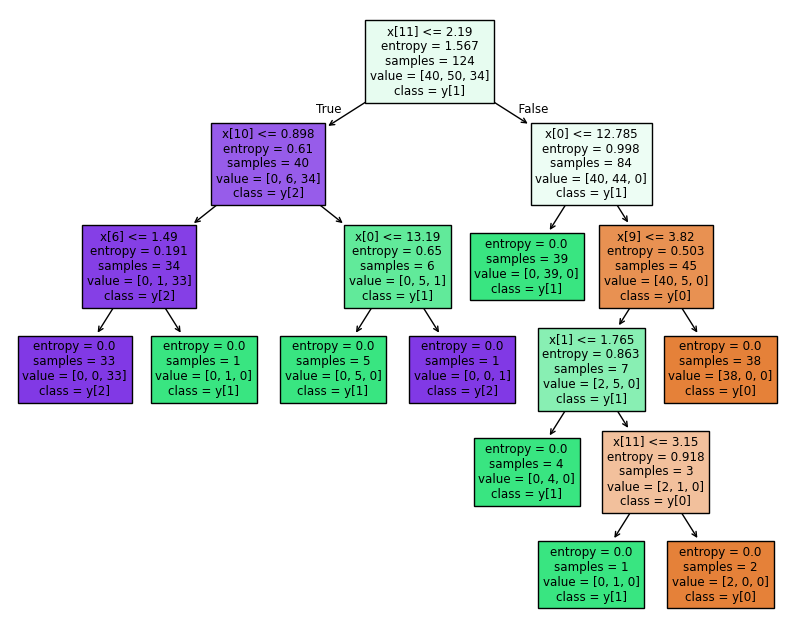

In [ ]:
# Plotagem da árvore construída pelo modelo
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
figure(figsize=(10, 8))

plot_tree(clf, filled=True, class_names=True)

❓ Qual é o atributo que mais distingue os tipos de vinho do conjunto?

R:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
O atributo 11, pois foi escolhido pelo algoritmo para ser o primeiro critério de divisão do conjunto. </details>
<br><br>

# 🌲 O que é Random Forest?
Random Forest é um algoritmo de aprendizado de máquina supervisionado baseado no conceito de **ensemble learning** (aprendizado em conjunto). Ele cria múltiplas árvores de decisão e combina seus resultados para obter previsões mais precisas e robustas.

Como o nome sugere, o algoritmo constrói uma "floresta" de "árvores de decisão aleatórias", onde cada árvore é treinada com uma amostra diferente dos dados e considera um subconjunto aleatório de características em cada divisão.

O Random Forest combina os princípios de duas técnicas poderosas:

1. **Bagging (Bootstrap Aggregating)**: Técnica que cria múltiplas amostras do conjunto de dados original através de amostragem com reposição
2. **Seleção aleatória de atributos**: Em cada nó de cada árvore, apenas um subconjunto aleatório de atributos é considerado para a divisão

Esta combinação de técnicas resulta em um modelo que é não apenas preciso, mas também robusto contra overfitting e capaz de lidar com dados ruidosos ou incompletos.

### Principais vantagens:
- Funciona tanto para classificação quanto para regressão;
- Reduz significativamente o risco de overfitting;
- Fornece medidas de importância das features do dataset;
- Além da previsão final, fornece a confiança (estatística) em cada classe;
- Mantém boa precisão mesmo com grandes conjuntos de dados;
- É fácil de usar, com poucas linhas de código, você faz um modelo poderoso.

## Como funciona o Random Forest?

O algoritmo Random Forest opera através de um processo sistemático que combina múltiplas árvores de decisão para produzir um resultado final mais preciso. Vamos entender passo a passo como ele funciona:

### 1. Criação de múltiplas amostras de dados (Bootstrap)

O primeiro passo do Random Forest é criar várias amostras do conjunto de dados original usando a técnica de **Bootstrap**:

- Cada amostra é criada selecionando aleatoriamente N observações do conjunto de dados original (onde N é o tamanho do conjunto original)
- A amostragem é feita **com reposição**, o que significa que uma mesma observação pode aparecer múltiplas vezes em uma amostra
- Tipicamente, cada amostra contém cerca de 63% dos dados originais, com alguns registros repetidos
- Os dados que não são selecionados para uma amostra específica são chamados de **Out-of-Bag (OOB)** e serão usados para validação

### 2. Construção de árvores de decisão independentes

Para cada amostra bootstrap, o algoritmo constrói uma árvore de decisão, mas com uma modificação importante:

- Em cada nó da árvore, apenas um **subconjunto aleatório de atributos** é considerado para a divisão
- Se temos M atributos no total, geralmente são considerados √M atributos em cada divisão para problemas de classificação, ou M/3 para problemas de regressão
- Esta seleção aleatória de atributos garante que as árvores sejam diferentes entre si, mesmo quando construídas a partir de amostras bootstrap semelhantes
- Cada árvore é treinada até sua profundidade máxima, sem poda. O overfitting é mitigado pela agregação de múltiplas árvores descorrelacionadas.

### 3. Agregação dos resultados (Voting/Averaging)

Após a construção de todas as árvores (geralmente centenas ou milhares), o Random Forest combina seus resultados:

- **Para classificação**: Cada árvore "vota" em uma classe, e a classe mais votada é a previsão final (votação majoritária)
- **Para regressão**: A previsão final é a média das previsões individuais de cada árvore

### 4. Avaliação com dados Out-of-Bag

Uma característica interessante do Random Forest é a capacidade de avaliar seu próprio desempenho sem necessidade de um conjunto de validação separado:

- Para cada árvore, os dados Out-of-Bag (que não foram usados no treinamento) são utilizados para testar seu desempenho
- Combinando esses resultados para todas as árvores, obtém-se uma estimativa imparcial do erro de generalização do modelo
- Esta é chamada de **estimativa de erro Out-of-Bag (OOB)**

### 5. Medição da importância das variáveis

O Random Forest também fornece uma medida da importância de cada variável:

- A importância é calculada com base em quanto cada variável contribui para reduzir a impureza (ou erro) quando usada em divisões
- Variáveis que aparecem mais frequentemente nas divisões e que resultam em maior redução de impureza são consideradas mais importantes
- Esta medida ajuda a identificar quais variáveis têm maior impacto nas previsões

## Aplicações Práticas

O Random Forest é amplamente utilizado em diversos setores devido à sua versatilidade e eficácia:

### 1. Setor Financeiro
- **Detecção de fraudes**: Identifica padrões suspeitos em transações financeiras
- **Análise de risco de crédito**: Avalia a probabilidade de inadimplência de clientes

### 2. Setor de Saúde
- **Diagnóstico médico**: Auxilia na identificação de doenças com base em sintomas e resultados de exames
- **Previsão de readmissão hospitalar**: Identifica pacientes com maior risco de retorno ao hospital

### 3. Marketing e Vendas
- **Segmentação de clientes**: Agrupa clientes com comportamentos similares
- **Previsão de churn**: Identifica clientes com maior probabilidade de cancelar serviços

##O que são Hiperparâmetros?
Diferente dos parâmetros que o modelo aprende durante o treinamento (como os coeficientes em uma regressão), os hiperparâmetros são configurações que definimos antes do treinamento. A escolha correta desses valores pode impactar significativamente a precisão e a capacidade de generalização do modelo.

**Parâmetros importantes do Random Forest:**
- `n_estimators`: Número de árvores na floresta. Mais árvores geralmente resultam em melhor desempenho, mas aumentam o tempo de treinamento.
- `max_depth`: Profundidade máxima das árvores. `None` significa que as árvores crescerão até que todas as folhas sejam puras ou contenham menos amostras que o mínimo necessário.
- `min_samples_split=2`: Número mínimo de amostras necessárias para dividir um nó interno. O valor padrão 2 significa que um nó será dividido se tiver pelo menos 2 amostras.
- `min_samples_leaf=1`: Número mínimo de amostras necessárias em um nó folha. O valor padrão 1 permite folhas com apenas uma amostra.
- `max_features`: Número de atributos por árvore ao procurar a melhor divisão. 'sqrt' é a raiz quadrada do número total de atributos.
- `bootstrap=True`: Usa bootstrap para criar amostras para cada árvore.
- `random_state`: Define uma semente aleatória para garantir reprodutibilidade.

## O que é Validação Cruzada (Cross-Validation)?
A validação cruzada é uma técnica para avaliar a performance de um modelo de forma mais robusta. Em vez de apenas dividir os dados em um conjunto de treino e um de teste, a validação cruzada k-fold (a mais comum) funciona assim:

1.   O conjunto de dados de treino é dividido em k partes ("folds").
2.   O modelo é treinado k vezes. A cada vez, uma parte diferente é usada como conjunto de teste e as k-1 partes restantes são usadas para treino. <br>
3.   A pontuação final do modelo é a média das pontuações obtidas em cada uma das k iterações. <br>

Isso garante que o modelo foi testado em todas as amostras dos dados, fornecendo uma estimativa de desempenho menos enviesada.

## GridSearchCV (Grid Search com Cross-validation)
O GridSearchCV do Scikit-learn automatiza o processo de busca pelos melhores hiperparâmetros. Ele combina uma busca exaustiva em grade com a validação cruzada.

1.   Definir a Grade (Grid): Você define um "grid" de hiperparâmetros, que é basicamente um dicionário onde as chaves são os nomes dos hiperparâmetros e os valores são as listas de valores que você quer testar.
2.   Busca e Validação: O GridSearchCV testa exaustivamente todas as combinações possíveis de valores do seu grid. Para cada combinação, ele realiza uma validação cruzada (com o número de folds que você definir no parâmetro cv) e calcula a pontuação média.
3.   Melhor Modelo: Ao final do processo, ele informa qual combinação de hiperparâmetros obteve a melhor pontuação média e automaticamente retreina um novo modelo com esses melhores parâmetros usando todos os dados de treino.

## Questões de Múltipla Escolha

**1:** Qual das seguintes NÃO é uma característica fundamental do algoritmo Random Forest?

a)  Criação de múltiplas árvores de decisão.<br>
b)  Uso da técnica de Bagging (Bootstrap Aggregating).<br>
c)  Poda extensiva de cada árvore individual para evitar overfitting.<br>
d)  Seleção aleatória de um subconjunto de atributos em cada nó para divisão.<br><br>


In [ ]:
Resposta:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
Alternativa C. </details>
<br><br>

**2:** Qual a principal vantagem de usar a seleção aleatória de atributos em cada nó da árvore no Random Forest?

a)  Garantir que todas as árvores sejam idênticas.<br>
b)  Aumentar a correlação entre as árvores para melhorar a precisão.<br>
c)  Reduzir a variância e a correlação entre as árvores, tornando o modelo mais robusto.<br>
d)  Acelerar o treinamento de cada árvore individual.

In [ ]:
Resposta:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
Alternativa C. </details>
<br><br>

##Questões Verdadeiro ou Falso

**3:** O Random Forest só pode ser aplicado a problemas de classificação, não de regressão.

In [ ]:
Resposta:

**4:** Uma das principais vantagens do Random Forest é sua alta tendência (bias) e baixa variância.

In [ ]:
Resposta:

**5:** A técnica de Bootstrap no Random Forest envolve amostragem de dados COM reposição.

In [ ]:
Resposta:

**6:** As árvores individuais no Random Forest são tipicamente podadas para evitar overfitting, assim como em árvores de decisão tradicionais.

In [ ]:
Resposta:

**7:** A estimativa de erro Out-of-Bag (OOB) pode ser usada como uma forma de validação cruzada interna, sem a necessidade de um conjunto de teste separado.

In [ ]:
Resposta:

**Gabarito (questões 3-7):**
<details>
<summary>Clique aqui para ver o gabarito</summary>

3: **F** (Funciona tanto para classificação quanto para regressão);

4: **F** (O objetivo é baixa tendência e a agregação ajuda a obter baixa variância no ensemble);

5: **V**;

6: **F** (As árvores são tipicamente crescidas até a profundidade máxima, sem poda);

7: **V**.
</details>

##Questões Dissertativas

**8:** Como a importância das variáveis (features) é calculada em um Random Forest?

In [ ]:
Resposta:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
A importância é calculada com base em quanto cada variável contribui para reduzir a impureza (ou erro) quando usada em divisões nas árvores. Variáveis que aparecem mais frequentemente nas divisões e que resultam em maior redução de impureza são consideradas mais importantes. </details>
<br><br>

**9:** O que são amostras "Out-of-Bag" (OOB) e qual sua utilidade?

In [ ]:
Resposta:

**Gabarito:**
<details>
<summary>Clique aqui para ver o gabarito</summary>
Amostras Out-of-Bag são observações do conjunto de dados original que não foram selecionadas durante o processo de bootstrap para treinar uma árvore específica. Elas são utilizadas como um conjunto de validação natural para avaliar o desempenho da árvore correspondente, permitindo estimar o erro de generalização sem necessidade de um conjunto de validação separado. </details>

#Projeto Exemplo com Random Forest

Neste exemplo, vamos implementar um modelo de Random Forest utilizando um dataset de vinhos.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score

from sklearn.datasets import load_wine

# Carregando o dataset Wine
data = load_wine()
X = data['data']
y = data['target']


# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Definindo Hiperparâmetros do GridSearch e Criando o Modelo de Random Forest
`RandomForestClassifier()`: Cria um modelo Random Forest para classificação.

**Parâmetros importantes:**
- `n_estimators`: Número de árvores na floresta. Mais árvores geralmente resultam em melhor desempenho, mas aumentam o tempo de treinamento.
- `max_depth`: Profundidade máxima das árvores. `None` significa que as árvores crescerão até que todas as folhas sejam puras ou contenham menos amostras que o mínimo necessário.
- `min_samples_split=2`: Número mínimo de amostras necessárias para dividir um nó interno. O valor padrão 2 significa que um nó será dividido se tiver pelo menos 2 amostras.
- `min_samples_leaf=1`: Número mínimo de amostras necessárias em um nó folha. O valor padrão 1 permite folhas com apenas uma amostra.
- `max_features`: Número de atributos considerados em cada divisão de nó ao procurar o melhor atributo. 'sqrt' é a raiz quadrada do número total de atributos.
- `bootstrap=True`: Usa bootstrap para criar amostras para cada árvore.
- `random_state`: Define uma semente aleatória para garantir reprodutibilidade.
<br><br>

In [ ]:
#Modelo de Random Forest com Cross Validation e teste de melhor Hiperparâmetro

# Definindo o grid de hiperparâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10],
    'max_samples': [0.5, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Criando o modelo para busca de hiperparâmetros
rf_grid = RandomForestClassifier(random_state=42)

# Aplicando Grid Search com validação cruzada
grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

# Executando o treino para a busca dos melhores hiperparâmetros
grid_search.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print("\nMelhores hiperparâmetros:")
print(grid_search.best_params_)
print(f"Melhor score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Melhores hiperparâmetros:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Melhor score: 0.9846


#Verificando Overfitting

In [ ]:
# VERIFICANDO OVERFITTING
# Obtendo os resultados do grid search
results = pd.DataFrame(grid_search.cv_results_)

# Extraindo os scores de treino e validação para o melhor modelo
best_index = grid_search.best_index_
train_score = results['mean_train_score'][best_index]
valid_score = results['mean_test_score'][best_index]

print(f"F1-score médio no treino: {train_score:.4f}")
print(f"F1-score médio na validação: {valid_score:.4f}")
print(f"Diferença (treino - validação): {train_score - valid_score:.4f}")

# Verificando se há overfitting
if train_score - valid_score > 0.05:
    print("Possível overfitting detectado (diferença > 0.05)")
else:
    print("Modelo bem ajustado: Sem sinais significativos de overfitting")

F1-score médio no treino: 0.9982
F1-score médio na validação: 0.9846
Diferença (treino - validação): 0.0135
Modelo bem ajustado: Sem sinais significativos de overfitting


#Métricas de Avaliação do Modelo

In [ ]:
best_rf = grid_search.best_estimator_

# Fazendo previsões com o modelo otimizado no conjunto de teste
y_test_pred = best_rf.predict(X_test)

test_f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"F1-score no teste: {test_f1:.4f}")


print("\nRelatório de classificação do melhor modelo:")
print(classification_report(y_test, y_test_pred, target_names=data.target_names))

F1-score no teste: 0.9829

Relatório de classificação do melhor modelo:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



**Lembrando**: <br>
**Precisão**: previsões corretas em relação ao total de previsões <br>
**Revocação**: proporção de previsões positivas que estavam de fato corretas. VP / (VP + FP)<br>
**Acurácia**: proporção de valores positivos reais que foram corretamente identificados pelo modelo. VP / (VP + FN)
**F1-Score**: É a média harmônica entre Precisão e Recall. Faz uma avaliação balanceada do modelo.

# Verificando a importância das características no modelo otimizado

- `rf_model.feature_importances_`: Atributo do modelo Random Forest que contém a importância de cada atributo (feature do dataset).
- A importância é calculada com base em quanto cada atributo contribui para reduzir a impureza (ou erro) quando usada em divisões.

In [ ]:
# Obtém as importâncias das features do modelo
feature_importances = best_rf.feature_importances_

# Cria uma lista de tuplas (nome_da_feature, importância)
features_sorted = sorted(zip(data.feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Imprime as features ordenadas por importância
print("\nImportância das características no modelo otimizado (da mais importante para a menos importante):")
for feature_name, importance in features_sorted:
    print(f"{feature_name}: {importance:.4f}")


Importância das características no modelo otimizado (da mais importante para a menos importante):
flavanoids: 0.1907
alcohol: 0.1594
color_intensity: 0.1312
proline: 0.1192
od280/od315_of_diluted_wines: 0.1044
hue: 0.0971
total_phenols: 0.0398
malic_acid: 0.0358
magnesium: 0.0355
proanthocyanins: 0.0310
ash: 0.0215
alcalinity_of_ash: 0.0195
nonflavanoid_phenols: 0.0150


# O que é Clusterização (Clustering)?
Clusterização, ou análise de agrupamento, é uma das tarefas mais importantes do aprendizado de máquina não supervisionado. O objetivo principal é simples: agrupar um conjunto de objetos (ou pontos de dados) de tal forma que objetos no mesmo grupo (chamado de cluster) sejam mais similares entre si do que com aqueles em outros grupos.

Diferente do aprendizado supervisionado (como classificação e regressão), na clusterização nós não temos um "rótulo" ou uma "resposta correta" para os dados. O algoritmo explora a estrutura dos dados por conta própria para encontrar padrões ou agrupamentos naturais.

Pense em organizar uma cesta de frutas variadas: você naturalmente criaria grupos de "maçãs", "bananas" e "laranjas" sem precisar de instruções prévias, baseando-se em características como cor, formato e tamanho. A clusterização faz exatamente isso, mas com dados.

## Principais Aplicações Práticas
A capacidade de encontrar grupos intrínsecos nos dados torna a clusterização uma técnica extremamente útil em diversas áreas:

1. **Marketing e Negócios** <br>
Segmentação de Clientes: Agrupar clientes com base em seu comportamento de compra, demografia ou interação com o site. Isso permite criar campanhas de marketing personalizadas e mais eficientes.
2. **Biologia e Saúde**<br>
Análise Genética: Agrupar genes com padrões de expressão semelhantes, o que pode ajudar a identificar genes envolvidos em doenças.
Classificação de Pacientes: Identificar grupos de pacientes com sintomas ou respostas a tratamentos similares.
3. **Processamento de Imagens** <br>
Segmentação de Imagens: Agrupar pixels de cores semelhantes para identificar objetos ou separar o fundo de uma imagem.
4. **Detecção de Anomalias** <br>
Detecção de Fraudes: Identificar transações ou atividades que são muito diferentes do comportamento "normal" de um grupo, tratando-as como outliers (pontos que não pertencem a nenhum cluster).

## K-Means (Algoritmo de Clusterização Mais Popular)
O K-Means é um dos algoritmos de clusterização mais conhecidos e utilizados devido à sua simplicidade e eficiência. Ele é um algoritmo de partição, o que significa que ele divide os dados em um número K de clusters pré-definido pelo usuário.

O K-Means funciona através de um processo iterativo simples:

**1. Escolha do Número de Clusters (K)** <br>
O primeiro passo é definir K, o número de clusters que você deseja encontrar nos dados. A escolha de K é um passo crucial e pode ser orientada por conhecimento de negócio ou por métodos estatísticos (como o Método do Cotovelo, que veremos a seguir).

**2. Inicialização dos Centroides** <br>
O algoritmo começa inicializando aleatoriamente K pontos no espaço de dados. Esses pontos são chamados de centroides e funcionarão como os centros iniciais dos clusters.

**3. Passo de Atribuição (Assignment Step)** <br>
Para cada ponto de dado, o algoritmo calcula sua distância para cada um dos K centroides (geralmente usando a distância Euclidiana). O ponto de dado é então atribuído ao cluster do centroide mais próximo.

**4. Passo de Atualização (Update Step)** <br>
Após todos os pontos terem sido atribuídos a um cluster, o algoritmo recalcula a posição de cada um dos K centroides. O novo centroide de um cluster é a média de todos os pontos de dados atribuídos a ele.

**5. Repetição** <br>
Os passos 3 e 4 são repetidos iterativamente. A cada iteração, os centroides se movem e os pontos podem ser reatribuídos a outros clusters. O processo para quando as atribuições dos clusters não mudam mais, ou seja, quando os centroides se estabilizam.

Animação ilustrando o processo iterativo do K-Means: atribuição (pontos ganham a cor do centroide mais próximo) e atualização (centroides se movem para o centro de seus pontos).

## Como Escolher o Número Certo de Clusters (K)?
A maior desvantagem do K-Means é a necessidade de definir K antecipadamente. Uma técnica comum para encontrar um valor ideal para K é o Método do Cotovelo (Elbow Method).

O método funciona da seguinte forma:

1. Rode o algoritmo K-Means para diferentes valores de K (ex: de 1 a 10).
2. Para cada valor de K, calcule a WCSS (Within-Cluster Sum of Squares). A WCSS é a soma das distâncias ao quadrado entre cada ponto de dado e o seu centroide. Intuitivamente, ela mede a compactação dos clusters.
3. Plote um gráfico de K versus WCSS.
4. O "cotovelo" da curva — o ponto onde a WCSS para de diminuir drasticamente — é geralmente considerado o valor ótimo para K. É o ponto de equilíbrio, onde adicionar mais um cluster não melhora significativamente a compactação total.
Neste exemplo, o "cotovelo" está em K=3, sugerindo que 3 é um bom número de clusters para esses dados.

## Vantagens e Desvantagens do K-Means
✅ **Vantagens**

1. Simplicidade e Rapidez:** É fácil de implementar e computacionalmente eficiente, escalando bem para grandes conjuntos de dados.<br>
2. **Fácil Interpretação:** Os resultados são fáceis de entender: grupos de dados em torno de um centro. <br><br>

❌ **Desvantagens**

1. **Sensibilidade à Inicialização:** Os resultados podem variar dependendo da posição inicial aleatória dos centroides.<br>
2. **Formato dos Clusters:** Tende a criar clusters esféricos e de tamanhos semelhantes, tendo dificuldade com clusters de formatos irregulares ou densidades variadas.<br>
3. **Sensibilidade a Outliers:** Como os centroides são baseados na média, eles podem ser facilmente "puxados" por outliers.

# Exemplo prático de Clusterização com K-Means

## 1. Criando dados do Dataset de Exemplo

Vamos criar um conjunto de dados de exemplo com grupos visualmente claros. <br>
**make_blobs** gera "bolhas" de dados, perfeitas para testar clusterização.<br>
**n_samples:** número total de pontos.<br>
**centers:** número de grupos (clusters) que queremos gerar.<br>
**cluster_std:** desvio padrão dos clusters (quão espalhados eles são).<br>
**random_state:** garante que os mesmos pontos sejam gerados toda vez que o código rodar.


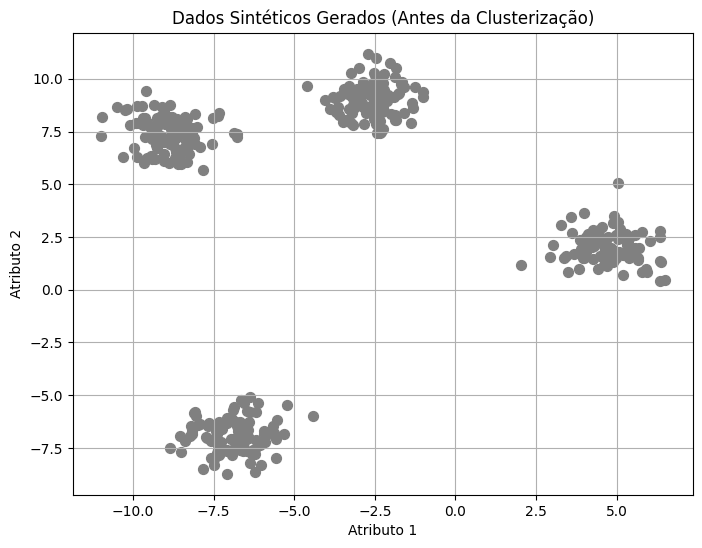

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_verdadeiro = make_blobs(n_samples=400, centers=4,
                              cluster_std=0.8, random_state=42)

# Visualizando os dados gerados (ainda sem clusters)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', marker='o')
plt.title("Dados Sintéticos Gerados (Antes da Clusterização)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.grid(True)
plt.show()

## 2. Encontrando o Número Ideal de Clusters
Para encontrar o número ideal de clusters para o problema, utilizaremos o método do cotovelo. <br>
Vamos testar o K-Means com K variando de 1 a 10. <br>
WCSS (Within-Cluster Sum of Squares) é a soma dos quadrados das distâncias
entre cada ponto e seu centroide. No Scikit-learn, isso é o atributo 'inertia_'.

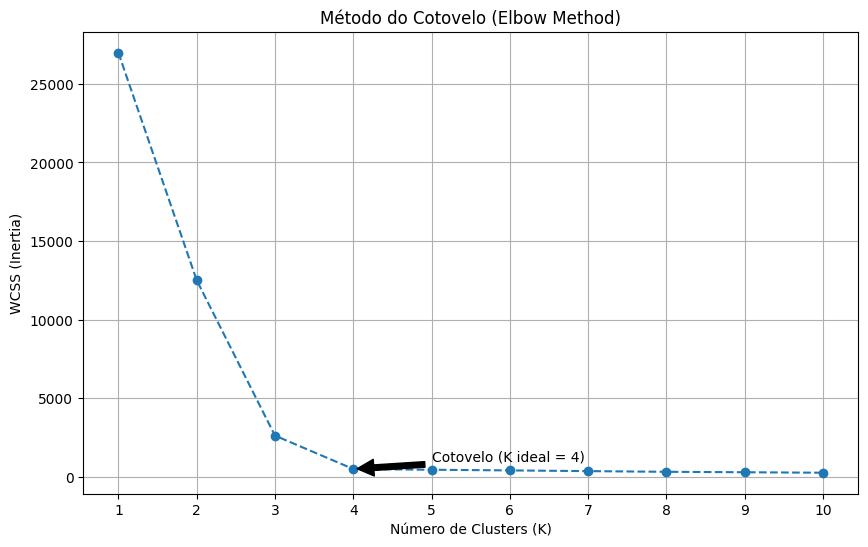

In [ ]:
wcss = []
faixa_k = range(1, 11)

for k in faixa_k:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(faixa_k, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(faixa_k)
plt.grid(True)
# Adicionando uma anotação para destacar o "cotovelo"
plt.annotate('Cotovelo (K ideal = 4)', xy=(4, wcss[3]), xytext=(5, 1000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

## 3. Treinamento do K-Means
Escolhemos K=4, observando o gráfico do método do cotovelo.

In [ ]:
k_otimo = 4
kmeans_final = KMeans(n_clusters=k_otimo, init='k-means++', n_init=10, max_iter=300, random_state=42)

# Treinando o modelo e atribuindo cada ponto a um cluster
y_kmeans = kmeans_final.fit_predict(X)

## 4. Visualização dos Clusters Resultantes


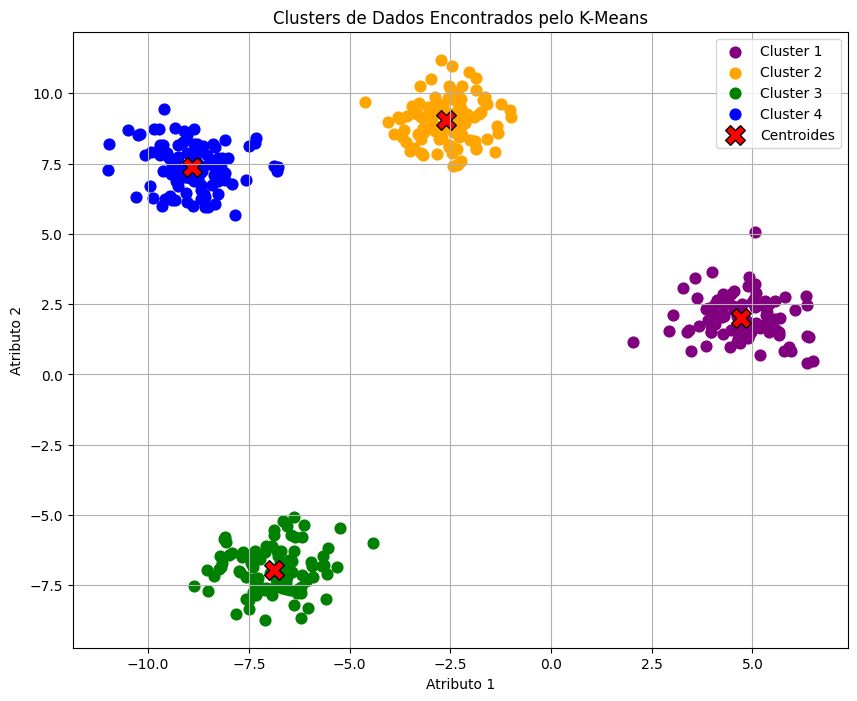

In [ ]:
plt.figure(figsize=(10, 8))

# Plotando os pontos de dados, colorindo-os de acordo com o cluster atribuído
# Cada valor único em 'y_kmeans' (0, 1, 2, 3) corresponde a um cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=60, c='purple', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=60, c='orange', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=60, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=60, c='blue', label='Cluster 4')

# Plotando os centroides dos clusters
# kmeans_final.cluster_centers_ retorna as coordenadas dos centroides
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroides', edgecolors='black')

plt.title('Clusters de Dados Encontrados pelo K-Means')
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.legend()
plt.grid(True)
plt.show()